In [1]:
import math

In [2]:
import pipe_pytools.polar_plot as pp
import pipe_pytools.tools as tl
import pipe_pytools.grid as gr

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pipeSym_func as sym

In [6]:
t,dt,cf,Re,Xmax,epsr,lx,Jm,lt,nsym,vel = tl.get_dcp("/home/user/workspace/experiments/change_nsym/ns2000Re1890up.dcp")

In [8]:
print t,dt,cf,Re,Xmax,epsr,lx,Jm,lt,nsym

32.1238150488 0.321238150488 0.586820386533 1890.2 120.0 0.25 10 40 5 2.0


In [9]:
sym.init(Xmax,epsr,nsym,lx,Jm,lt,Re=Re)

In [10]:
sym.look()

Xmax=120.000000, epsr=0.250000, dsym=2.000000
Im=1024, Jm=40, Km=32
hx=0.117188, ht=0.049087
Re=1890.200000


In [11]:
cf

0.5868203865327648

In [12]:
x = gr.X(2**lx, Xmax)
r = gr.R(Jm, epsr)
th = gr.Th(2**lt, nsym)

In [13]:
Im = x.m
hx = x.h
yt = r.f
yt1 = r.f1
rt = r.n
rt1 = r.n1
Km = th.m
ht = th.h

In [14]:
class Prt_nl:
    def __init__(self):
        self.cx = sym.new_z_vfield()
        self.dx = sym.new_z_vfield()
        self.n = 0
        
    def __call__(self, nstep, time, dt, vel, velt, om, p, cf):
        print '+',
        
        cux,cvx,cwx = self.cx
        d1x,d23x,_ = self.dx
        u,v,w = vel
        ox,on,ot = om
        
        ut = np.zeros_like(u)
        ur = np.zeros_like(u)
        ux = np.zeros_like(u)
        vx = np.zeros_like(v)
        wx = np.zeros_like(w)
        oxx = np.zeros_like(ox)
        oxr = np.zeros_like(ox)
        oxt = np.zeros_like(ox)


        for k in range(1,Km+1):
            for j in range(1,Jm+1):
                for i in range(1,Im+1):
                    ut[k,j,i] = (u[k+1,j,i] - u[k,j,i]) / (rt[j] * ht)
                    ur[k,j,i] = (u[k,j+1,i] - u[k,j,i]) / rt1[j]
                    ux[k,j,i] = (u[k,j,i+1] - u[k,j,i]) / hx
                    vx[k,j,i] = (v[k,j,i+1] - v[k,j,i]) / hx
                    wx[k,j,i] = (w[k,j,i+1] - w[k,j,i]) / hx
                    oxx[k,j,i] = (ox[k,j,i+1] - ox[k,j,i]) / hx
                    oxr[k,j,i] = (ox[k,j+1,i] - ox[k,j,i]) / rt1[j]
                    oxt[k,j,i] = (ox[k+1,j,i] - ox[k,j,i]) / (rt[j] * ht)



        cux += -u*oxx
        cvx += -v*oxr
        cwx += -w*oxt
        d1x += ox*ux
        d23x += vx*ut - ur*wx
        self.n += 1
        
        return
    
    def __get__(self):
        return self.cx / self.n, self.dx / self.n
        

In [15]:
prt_nl = Prt_nl()

In [17]:
vel1 = vel.copy()
res = sym.calc(vel1,dt,cf,Re, maxnstep=100, prt=prt_nl, const_dt_chec=True)

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + Planned break! maxnstep reached


In [18]:
print (vel - vel1)[0,1:-1,1:-1,1:-1].max()

3.96889007638e-05


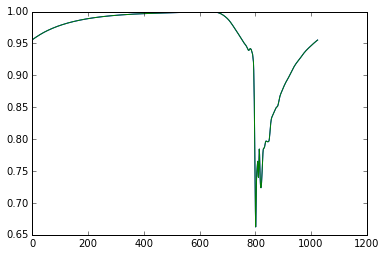

In [19]:
plt.plot(vel[0,1:-1,1,1:-1].mean(0))
plt.plot(vel1[0,1:-1,1,1:-1].mean(0))

In [20]:
cx = prt_nl.cx / prt_nl.n

In [21]:
dx = prt_nl.dx / prt_nl.n

In [22]:
tl.put_scp("fn1900up_cx.scp", t,dt,cf,Re,Xmax,epsr,lx,Jm,lt,nsym,cx)

In [23]:
tl.put_scp("fn1900up_dx.scp", t,dt,cf,Re,Xmax,epsr,lx,Jm,lt,nsym,dx)